### Cost Benefit Questions

1. How would you rephrase the business problem if your model was optimizing toward _precision_? i.e., How might the model behave differently, and what effect would it have?
2. How would you rephrase the business problem if your model was optimizing toward _recall_?
3. What would the most ideal model look like in this case?


### Visualizing models over variables

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../assets/dataset/flight_delays.csv')
df = df.loc[df.DEP_DEL15.notnull()].copy()

In [4]:
df.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
FL_DATE                   object
UNIQUE_CARRIER            object
AIRLINE_ID                 int64
CARRIER                   object
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_MARKET_ID        int64
CRS_DEP_TIME               int64
DEP_TIME                 float64
DEP_DEL15                float64
Unnamed: 15              float64
dtype: object

TypeError: 'tuple' object is not callable

In [5]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0,NaN
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214.0,0.0,NaN
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754.0,1.0,NaN


In [19]:
df.shape()

TypeError: 'tuple' object is not callable

In [7]:
df = df[df.DEP_DEL15.notnull()]
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier'))
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))
model = lm.LogisticRegression()
features = [i for i in df.columns if 'dow_' in i]

In [9]:
df[features].head()
print features

['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7']


In [10]:
df.shape

(458311, 37)

In [11]:
features += ['CRS_DEP_TIME']
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]]).T[1]

In [13]:
model.predict_proba(df[features[1:]]).T

array([[ 0.8708075 ,  0.8708075 ,  0.84189818, ...,  0.86784638,
         0.86411643,  0.85900557],
       [ 0.1291925 ,  0.1291925 ,  0.15810182, ...,  0.13215362,
         0.13588357,  0.14099443]])

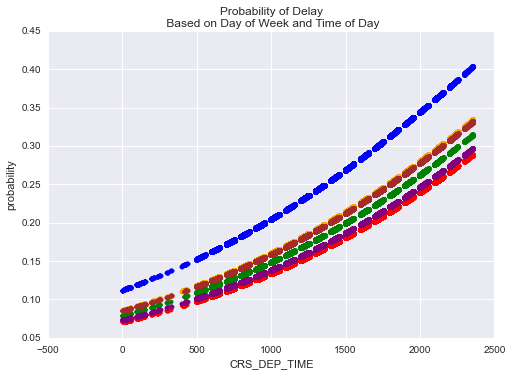

In [7]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')


In [21]:
df.groupby("CARRIER").apply (lambda group: len(group))

CARRIER
AA    43173
AS    13198
B6    20531
DL    63752
EV    48267
F9     6745
HA     6418
MQ    27670
NK     8647
OO    46946
UA    37454
US    32552
VX     4651
WN    98307
dtype: int64

### Other Answers: visualizing Airline or the inverse

In [22]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']
model.fit(df[features[1:]], df['DEP_DEL15'])




#...

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
df['probability'] = model.predict_proba(df[features[1:]]).T[1]

In [17]:
df[features[1:]].head()

,carrier_AS,carrier_B6,carrier_DL,carrier_EV,carrier_F9,carrier_HA,carrier_MQ,carrier_NK,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,CRS_DEP_TIME
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1230
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1220
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1305


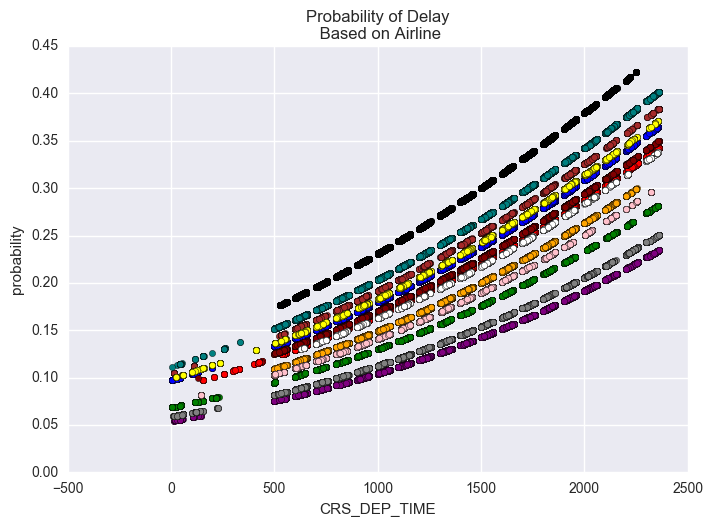

In [20]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']
model.fit(df[features[1:]],df['DEP_DEL15'])
df['probability'] = model.predict_proba(df[features[1:]]).T[1]
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'black', 'yellow', 'maroon','teal','gray','white']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color = c, ax=ax)
ax.set(title='Probability of Delay\n Based on Airline')

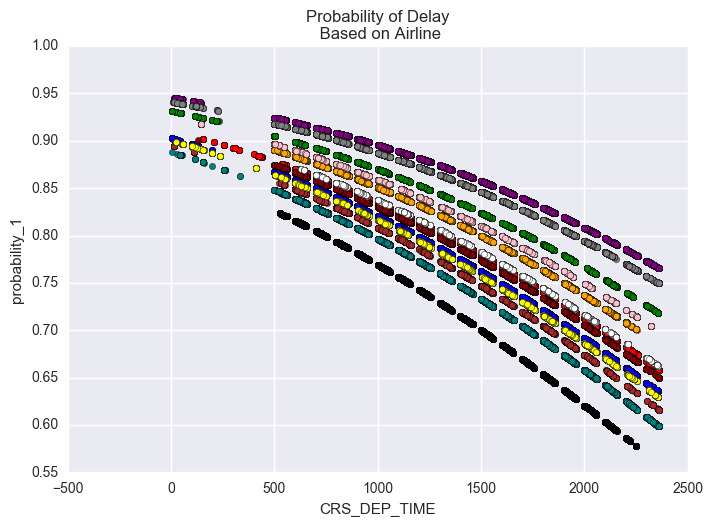

In [25]:
df['probability_1'] = model.predict_proba(df[features[1:]]).T[0]
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'black', 'yellow', 'maroon','teal','gray','white']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability_1', kind='scatter', color = c, ax=ax)
ax.set(title='Probability of Delay\n Based on Airline')

#instead of T[1] it became T[0] to represent the failures. Also changed the df probability to df probability_1 

### Visualizing Performance Against Baseline

#### Visualizing AUC and comparing Models

In [29]:
from sklearn import dummy, metrics

In [30]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

model1 = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_1'] = model.predict_proba(df[features[1:]]).T[1]


In [31]:
df.shape

(458311, 40)

[(0, 1),
 (0, 1),

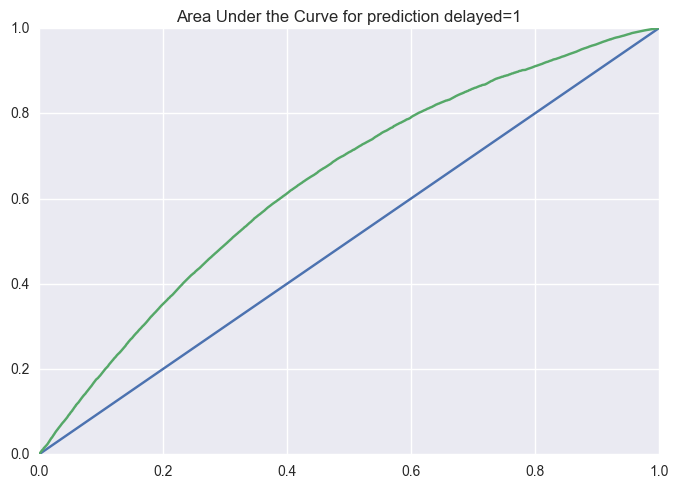

In [32]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

In [37]:
df['prediction'] = model.predict(df[features[1:]]).T[0]

In [38]:
metrics.accuracy_score(df.DEP_DEL15, df.prediction)

0.80149287274361736

#### Visualizing Precision / Recall

In [39]:
metrics.precision_score(df.DEP_DEL15, df.prediction)

/Users/ericdrake/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [41]:
print metrics.classification_report(df.DEP_DEL15, df.prediction)

#Derive the accuracy of our prediction model from this 
# precision = TP/(TP + FP)

             precision    recall  f1-score   support

        0.0       0.80      1.00      0.89    367333
        1.0       0.00      0.00      0.00     90978

avg / total       0.64      0.80      0.71    458311



/Users/ericdrake/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
